In [1]:
import numpy as np
u = np.arange(0, 5)


In [2]:
u.shape
u_0 = np.array([1])
u_0.shape

(1,)

In [3]:
np.concatenate((u, u_0))

array([0, 1, 2, 3, 4, 1])

In [4]:
for i in range(10):
    un = u.copy()
    u = un[1:] - u[0:-1]
    u_0 = np.array([1])
    u = np.concatenate((u_0, u))
    print(u)

[1 1 1 1 1]
[1 0 0 0 0]
[ 1 -1  0  0  0]
[ 1 -2  1  0  0]
[ 1 -3  3 -1  0]
[ 1 -4  6 -4  1]
[  1  -5  10 -10   5]
[  1  -6  15 -20  15]
[  1  -7  21 -35  35]
[  1  -8  28 -56  70]


In [5]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns

%matplotlib inline

In [6]:
def convection_2d(n = 20, tx = 20):
    nx = ny = n
        
    c = 1
    dx = dy = 2 / (nx - 1)
    dt = 0.25 * dx
    
    u = np.ones((nx, ny))
    u[int(0.5/dx): int(1/dx), int(0.5/dy): int(1/dy)] = 2  
    
    a = c * dt/dx
    
    history = u.copy()
    plt.imshow(history)
    print(history.shape)
    for n in range(tx):
        un = u.copy()
        u[1:, 1:] = un[1:, 1:] - a * (
            un[1:, 1:] - un[:-1, 1:]) - a * (
            un[1:, 1:] - un[1:, 0: -1])
        
        u[0, 0] = 1
        u[-1, -1] = 1
        history = np.dstack((history, u))
    return history

(200, 200)


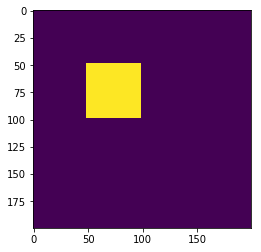

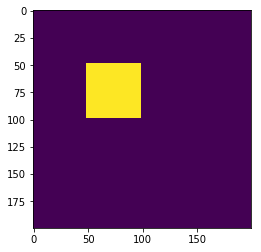

In [13]:
import seaborn as sns
tx = 200
n = 200
history = convection_2d(n=n, tx = tx)

fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.imshow(history[:, :, 0], vmin=1, vmax=2)

def animate(i):
    im.set_data(history[:, :, i])
    return im,

ani = animation.FuncAnimation(fig, animate, frames=tx)

from IPython.display import HTML
HTML(ani.to_html5_video())

In [8]:
from mpl_toolkits.mplot3d import Axes3D


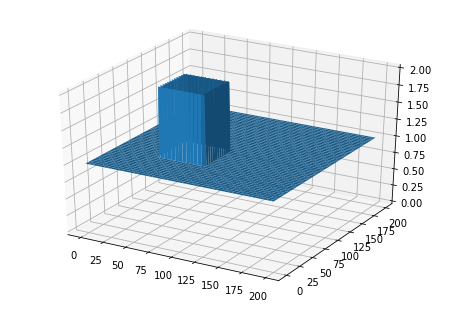

In [14]:

fig = plt.figure()
ax = Axes3D(fig)
X, Y = np.meshgrid(np.arange(n), np.arange(n))
surf = ax.plot_surface(X, Y, history[:, :, 0])
history[:, :, 0].shape

def animate(i):
    ax.clear()
    surf = ax.plot_surface(X, Y, history[:, :, i])
    ax.set_zlim((0,2))
    return surf,

ani = animation.FuncAnimation(fig, animate, frames=tx)
HTML(ani.to_html5_video())
